## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
print("Основна статистична інформація по числовим змінним:")
print(data.describe())

print("\nМаксимальні значення по всім змінним:")
print(data.max())
print("\nМінімальні значення по всім змінним:")
print(data.min())

print("\nРозмірність датасету:")
print(data.shape)

Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [4]:
print("Типи даних по кожній змінній:")
print(data.dtypes)

print("\nКількість даних по кожній змінній:")
print(data.count())

Типи даних по кожній змінній:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість даних по кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [5]:
missing_values = data.isnull().sum()
print("Кількість пропущених значень у кожній змінній:")
print(missing_values)

Кількість пропущених значень у кожній змінній:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

Завдання 1:
Я завантажив файл даних motorbike_ambulance_calls.csv за допомогою методу pd.read_csv() та зберіг його у змінній data. Цей файл містить інформацію про виклики на мотоциклі швидкої допомоги. Вивів основну статистичну інформацію по числовим змінним за допомогою методу describe(). Це дозволяє отримати огляд статистичних показників, таких як середнє значення, стандартне відхилення, медіану, мінімум та максимум, окремо вивів максимальні та мінімальні значення по всім змінним за допомогою методів max() та min(). Це допомагає зрозуміти діапазон значень кожної змінної. Вивів розмірність датасету за допомогою атрибута shape, що показує кількість рядків і стовпців у датасеті.

Завдання 2:
Перевірив типи даних кожної змінної за допомогою методу dtypes. Це допомагає зрозуміти, які типи даних представлені в датасеті.
Перевірив кількість даних по кожній змінній за допомогою методу count(). Це показує, скільки значень не є пропущеними для кожної змінної.

Завдання 3:
Перевірив всі змінні на наявність пропущених значень за допомогою методу isnull() та sum(). Це дозволяє визначити, скільки пропущених значень є у кожній змінній.
Дізнався чи потрібно додатково заповнювати пропущені значення в наших даних


**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [6]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


C:\Users\Max\AppData\Local\Temp\ipykernel_11284\3414913291.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [7]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
  
get_time_limits(data, "date")

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


In [ ]:
#Перетворив змінну date у формат дати
#Були визначені часові межі датасету: перший день та останній день, які можуть бути використані для подальшого аналізу даних за період часу

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [8]:
data_categorical = data.select_dtypes(include='object')

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [9]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  season_dictionary = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
  df[season_col_name] = df[season_col_name].map(season_dictionary)
  return df
  
data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

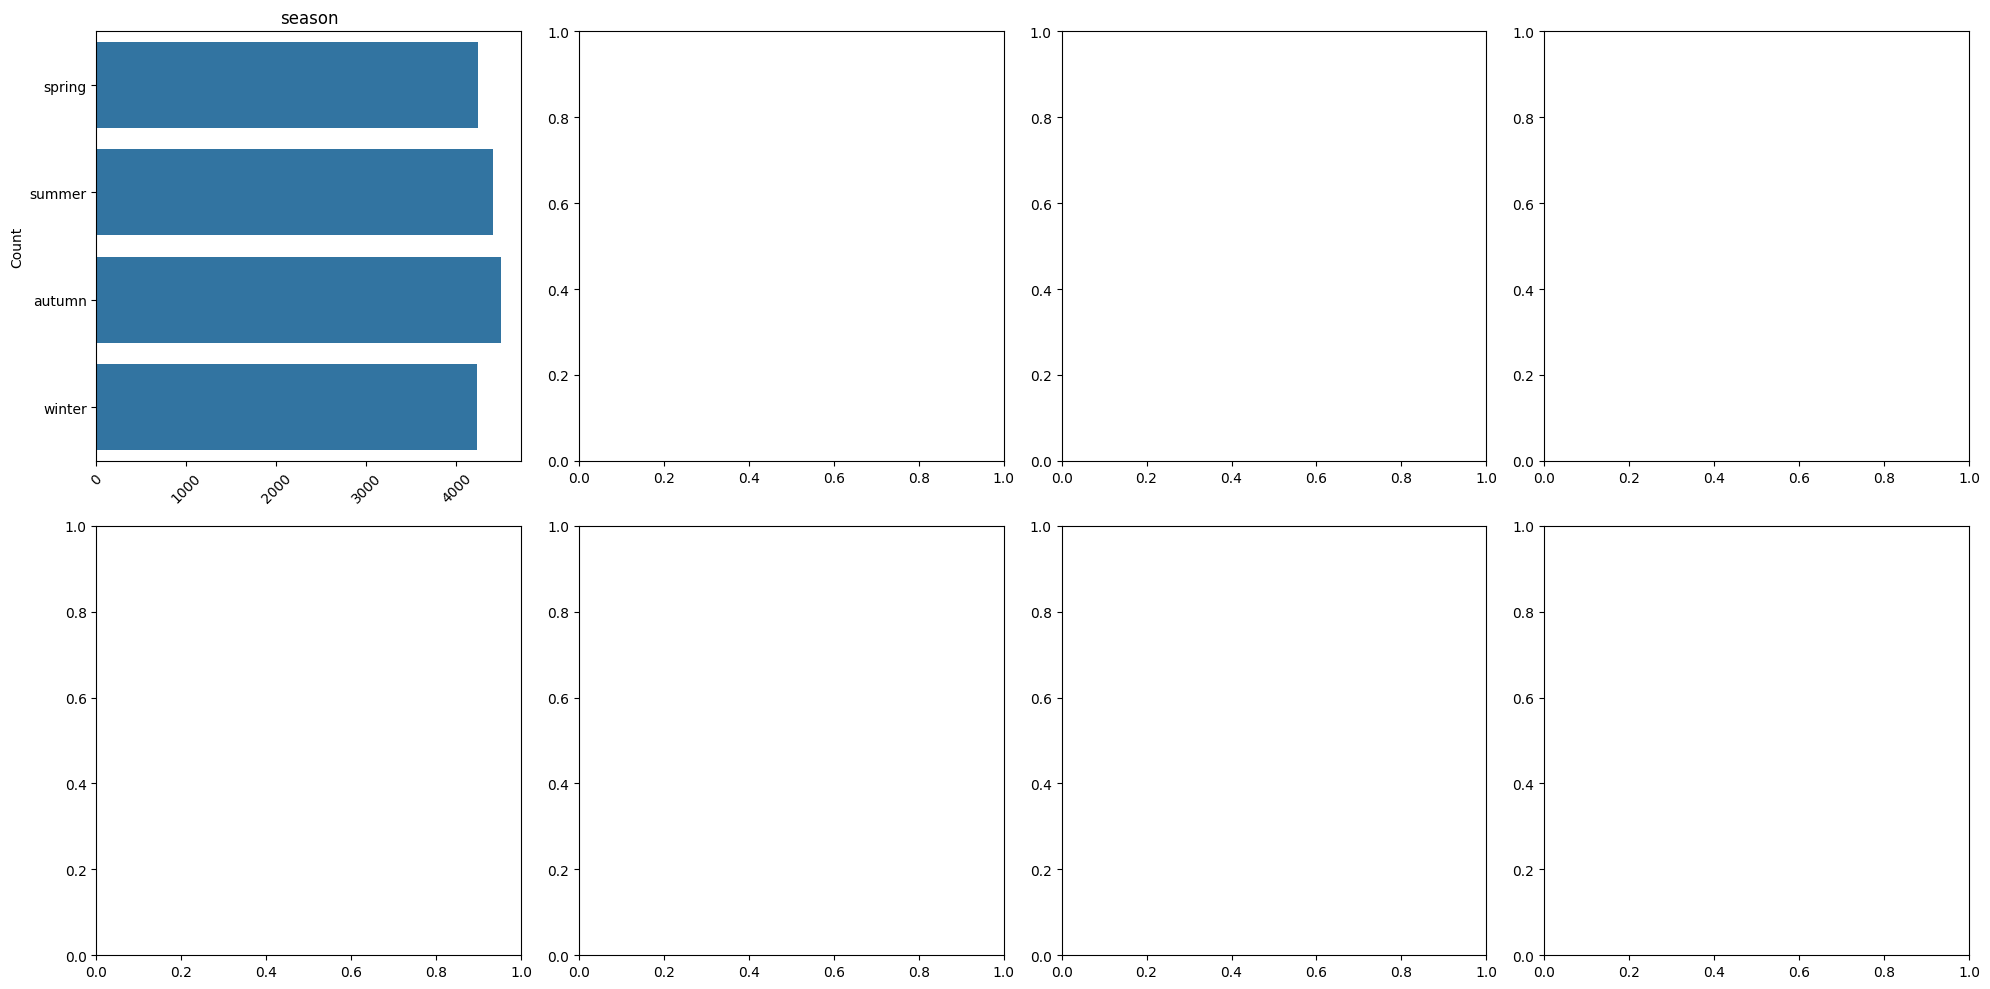

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(data_categorical, ax.flatten()):

  sns.countplot(data_categorical[variable], ax=subplot)
  subplot.set_title(variable)
  subplot.set_xlabel(None)
  subplot.set_ylabel('Count')
  
  for label in subplot.get_xticklabels():
  
    label.set_rotation(45)

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**

Завдання 5:
Для виділення категоріальних змінних у окремий датасет я використав метод select_dtypes() з параметром include='object'. Цей метод дозволяє вибрати стовпці, які мають тип даних 'object', що відповідає категоріальним змінним.

Завдання 6:
Для перетворення змінної season в числову шкалу я використав метод map(), використовуючи словник season_dictionary, де ключами є назви сезонів, а значеннями - відповідні числові значення. Це дозволяє замінити категоріальні значення на числові, що полегшує подальший аналіз даних.

Завдання 7:
Для побудови графіків countplot по всім категоріальним змінним використовувався цикл, який ітерується по кожній категоріальній змінній у датасеті data_categorical. Для кожної змінної побудований графік countplot, що показує кількість спостережень для кожної категорії. Кожен графік розміщувався на відповідному підграфіку у вигляді 2x4 сітки за допомогою subplots() з параметром figsize для встановлення розміру фігури. Використовувався метод set_title() для встановлення заголовка графіку, а також методи set_xlabel() та set_ylabel() для встановлення підписів осей. Для покращення читабельності міток осі X застосовувалася ротація на 45 градусів.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [11]:
data_numerical = data.select_dtypes(include='number')

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

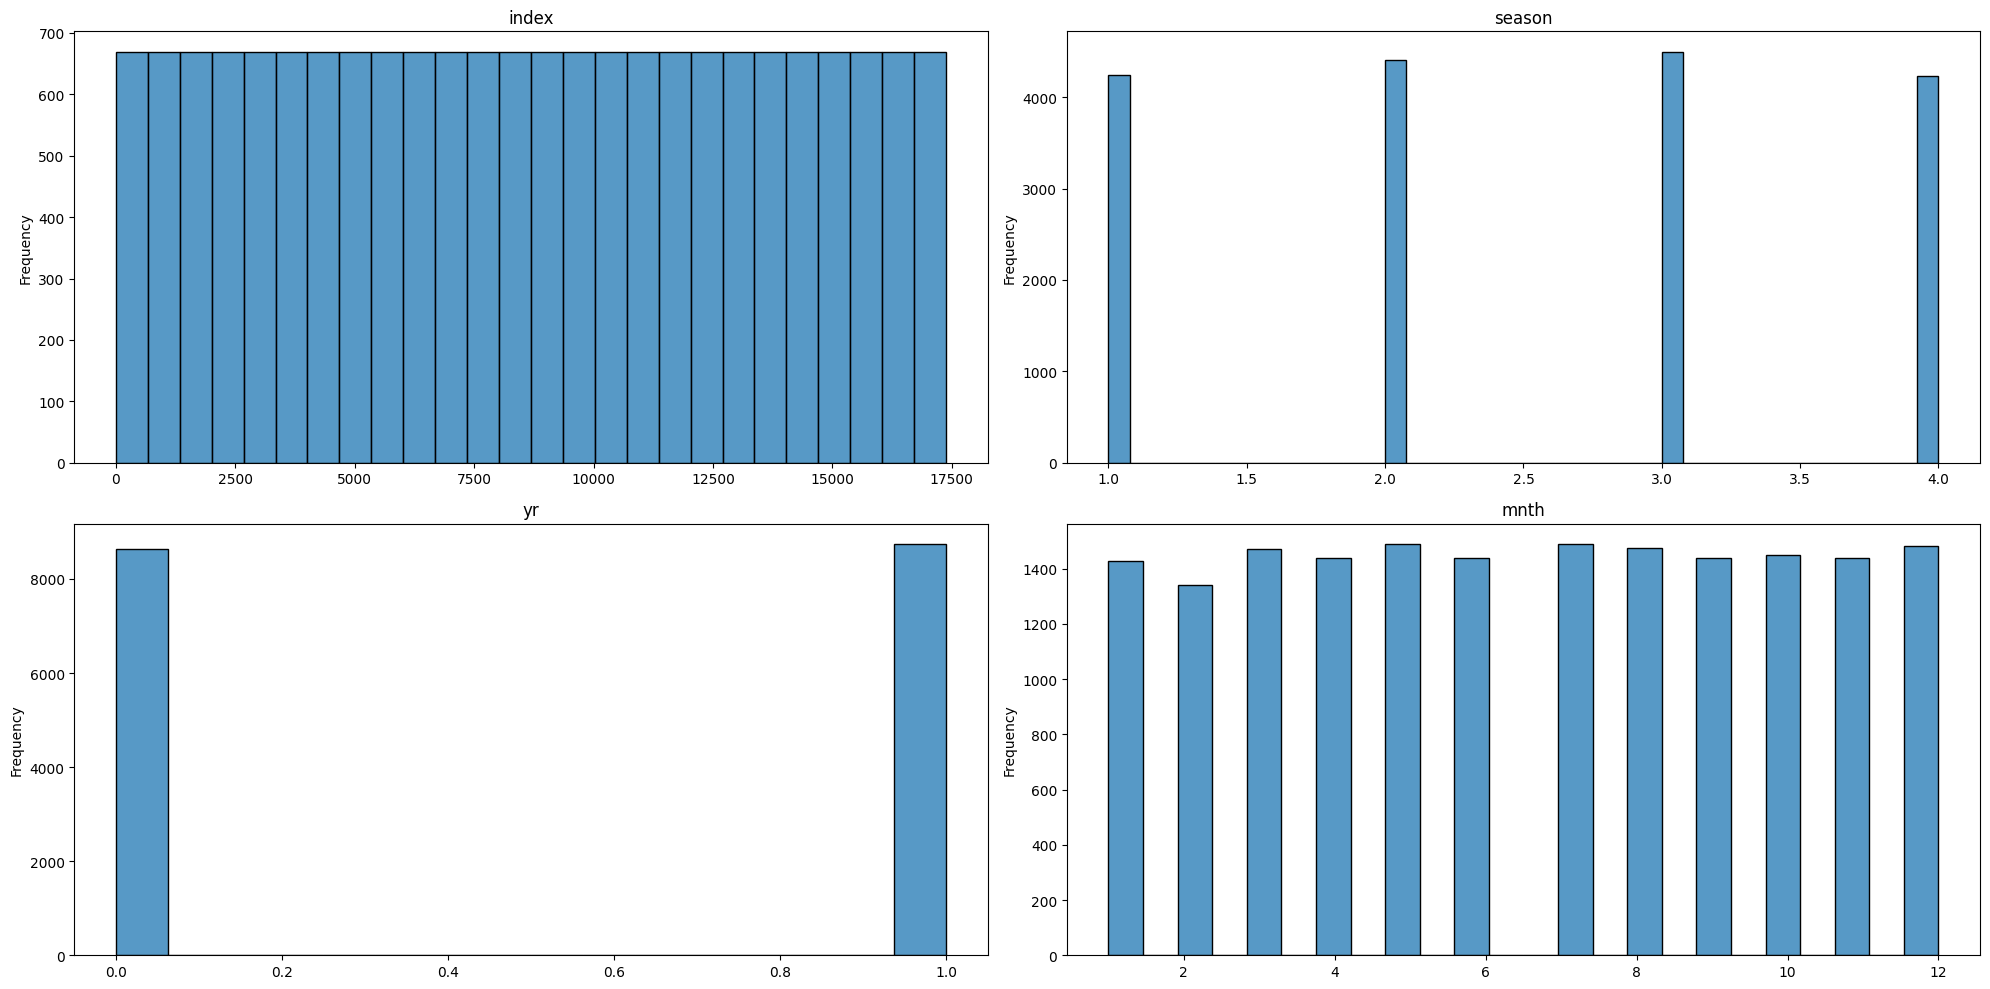

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for i, variable in enumerate(data_numerical.columns):
    
    row_index = i // 2
    col_index = i % 2
    
    if row_index < 2 and col_index < 2: 

        sns.histplot(data_numerical[variable], ax=ax[row_index, col_index])
        ax[row_index, col_index].set_title(variable)
        ax[row_index, col_index].set_xlabel(None)
        ax[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

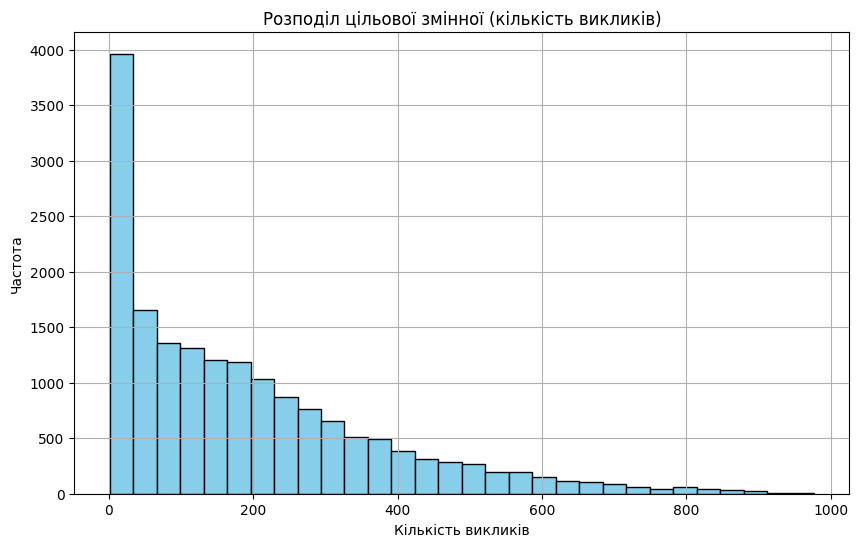

Коефіцієнт нахилу:  0.0018989526988145932


In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Розподіл цільової змінної (кількість викликів)')
plt.xlabel('Кількість викликів')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

slope_coefficient = data['cnt'].diff().mean()
print("Коефіцієнт нахилу: ", slope_coefficient)

**Висновки з 8-10 завдання (детальні)**

Завдання 8:
Для виділення числових змінних в окремий датасет я використав метод select_dtypes(). той метод дозволяє вибрати стовпці, які мають числовий тип даних. Результатом цього завдання був датасет data_numerical, який містить тільки числові змінні з вихідного датасету

Завдання 9:
Для побудови гістограм розподілу по всім числовим змінним використовувався цикл, який ітерується по кожній числовій змінній у датасеті data_numerical

Завдання 10:
Для побудови гістограми розподілу цільової змінної (кількість викликів) використовувався метод plt.hist(). Гістограма показує розподіл значень цільової змінної у вигляді стовпців з визначеними бінами

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

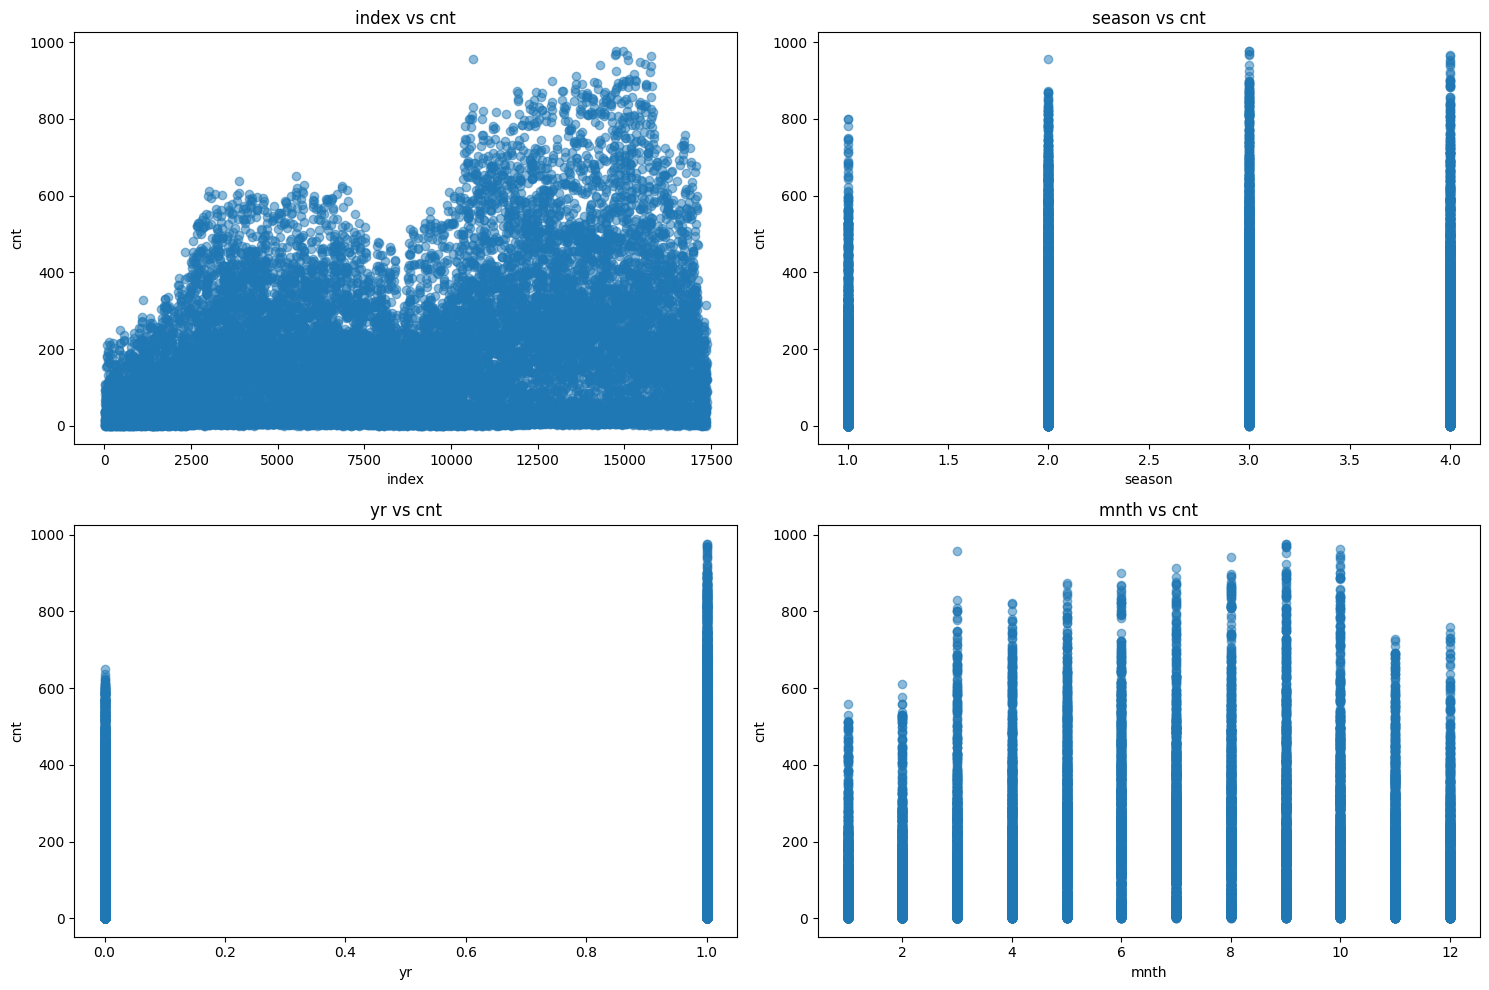

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))

for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    
    subplot.scatter(data_numerical[var], data_numerical['cnt'], alpha=0.5)
    subplot.set_title(f'{var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

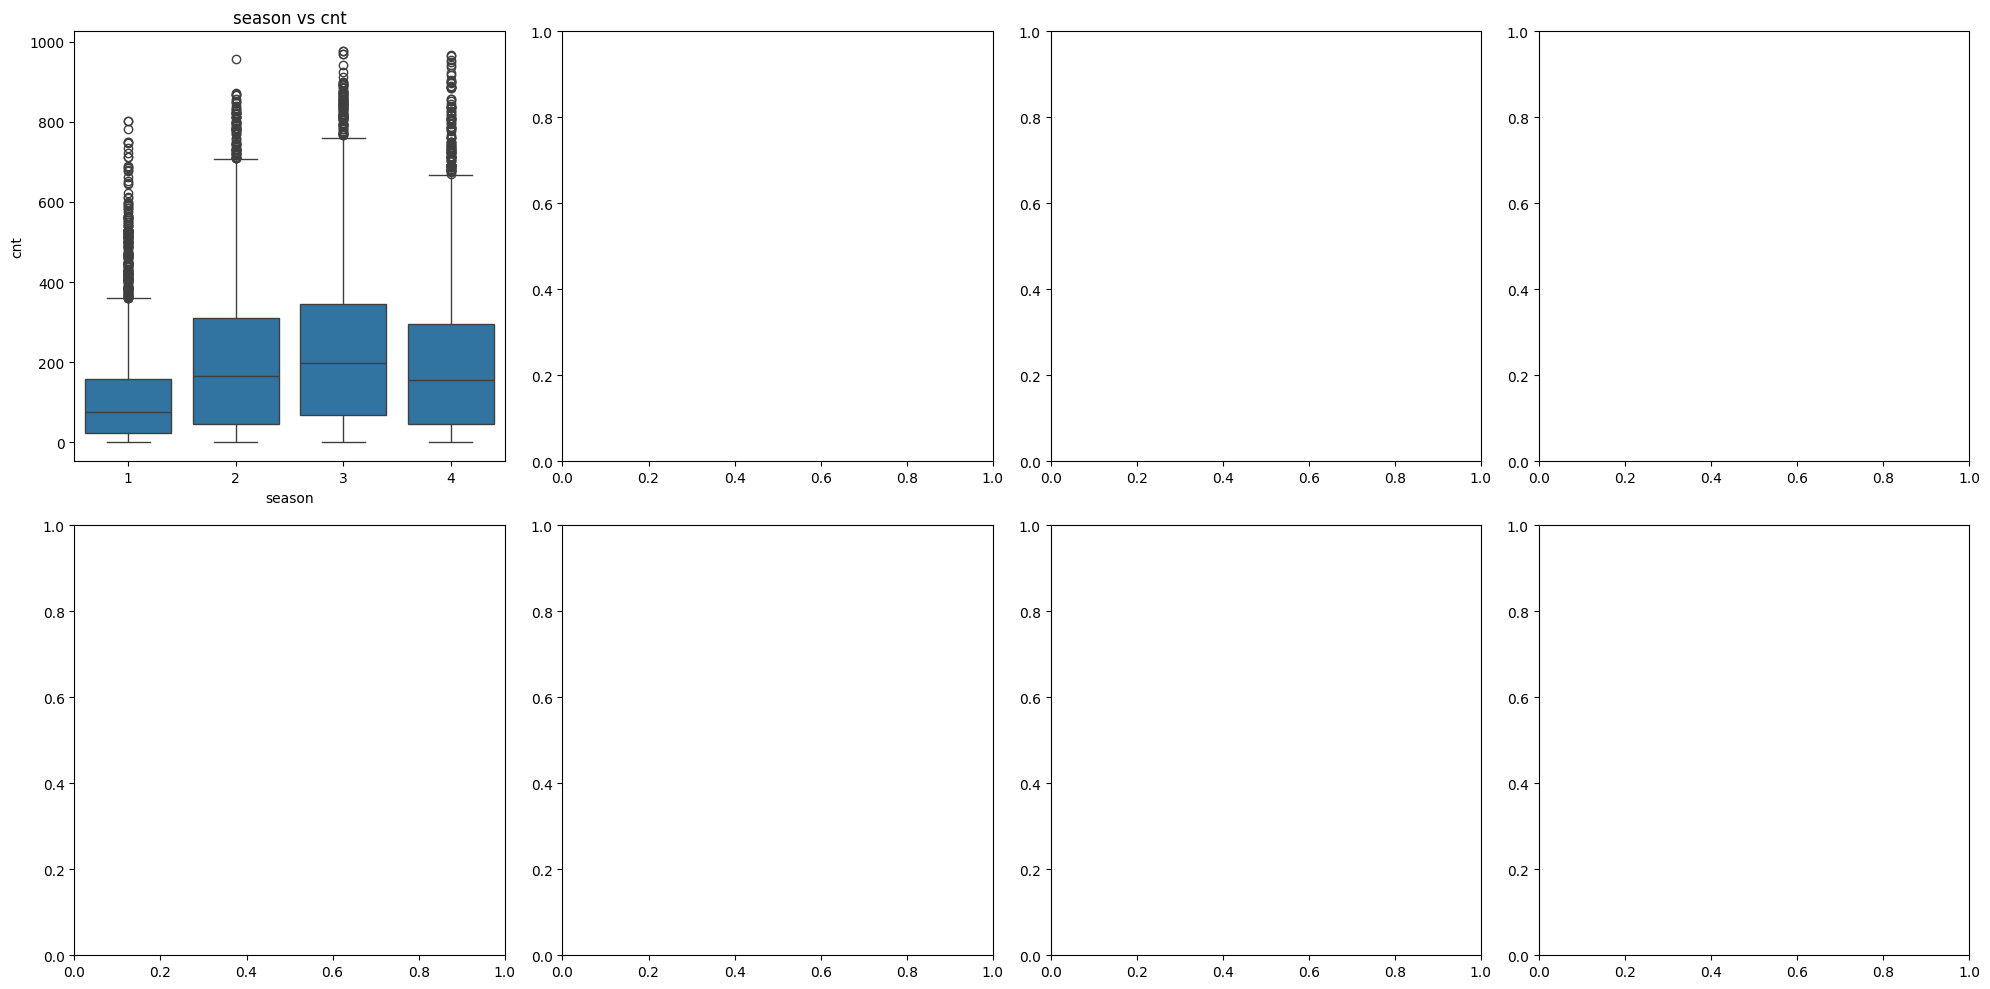

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

empty_plots = True

for var, subplot in zip(data_categorical, ax.flatten()):

  if not data.groupby(var)['cnt'].count().empty:

    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)
    subplot.set_title(f'{var} vs cnt')
    empty_plots = False

  else:

    subplot.axis('off')

if empty_plots:

  print("Порожні графіки. Відсутні дані для побудови.")
else:

  plt.tight_layout()
  plt.show()

**Висновки з 11-12 завдання (детальні)**

Завдання 11: Для побудови графіків співвідношення scatterplot між всіма числовими змінними і цільовою змінною cnt я використав цикл, який ітерується по кожній числовій змінній у датасеті data_numerical, за винятком цільової змінної cnt.

Завдання 12: Для побудови графіків співвідношення boxplot між категоріальними змінними і цільовою змінною cnt я використав цикл, який ітерується по кожній категоріальній змінній у датасеті data_categorical. 


**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

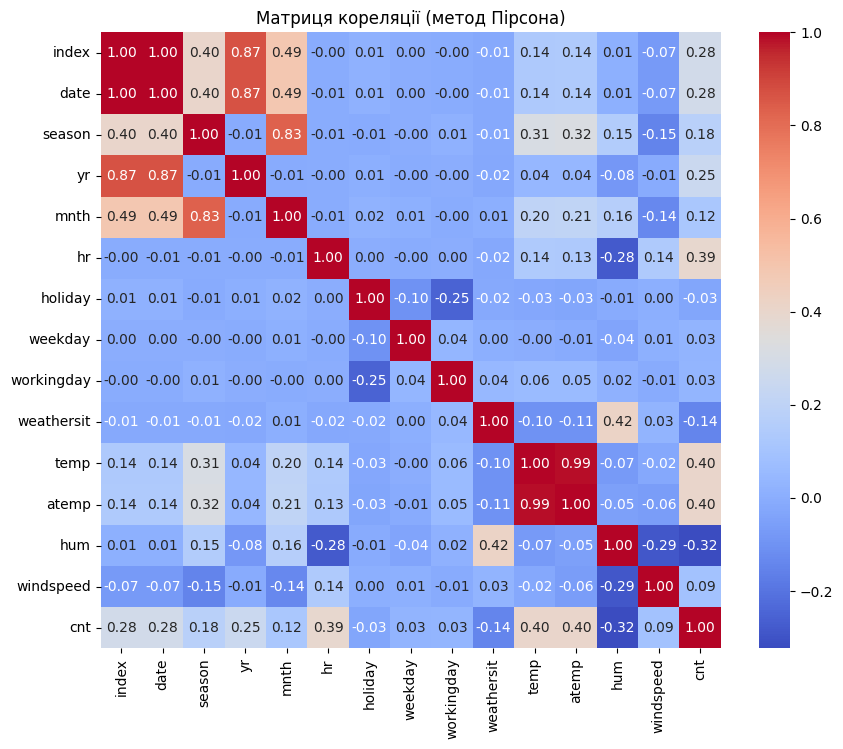

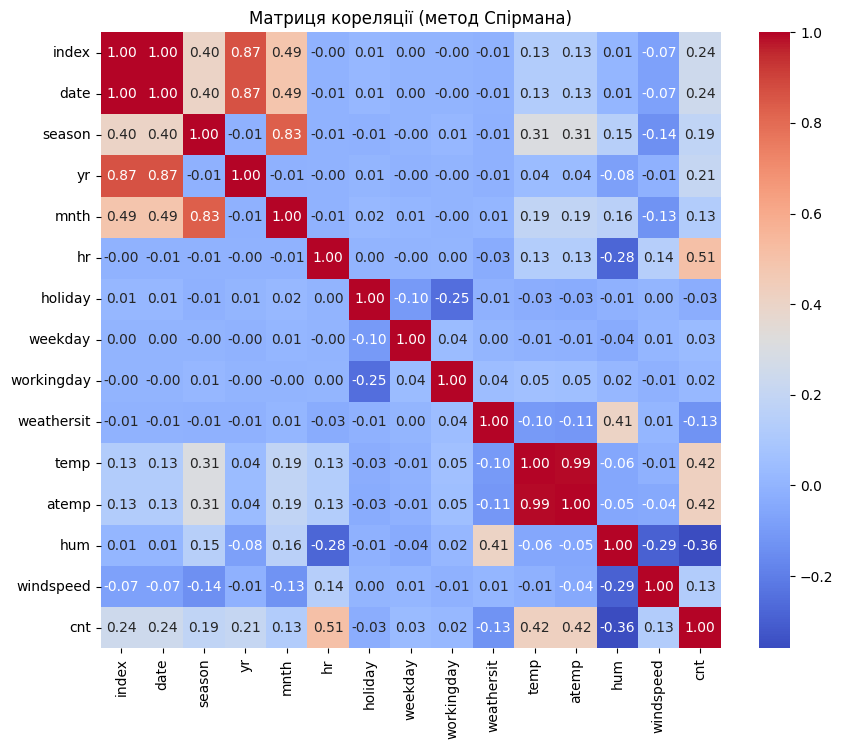

In [29]:
# Пірсона
correlation_pearson = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляції (метод Пірсона)")
plt.show()

# Спірмана
correlation_spearman = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляції (метод Спірмана)")
plt.show()


In [31]:
#Отримані результати вказують на наявність кореляційних зв'язків між різними змінними у датасеті. 

#Матриця кореляції за методом Пірсона показує лінійні зв'язки між числовими змінними
#матриця кореляції за методом спірмана показує не лінійні, а монотонні зв'язки між змінними. цей метод враховує не тільки лінійні, а й не лінійні взаємозв'язки між змінними

#Відмінність між цими методами полягає в тому, шо метод пірсона вимірює лінійну залежність між змінними, а метод Спірмана враховує будь-яку монотонну залежність

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')
                         ], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

In [25]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [ ]:
features['night_hours'] = ['day' if hour in range(6, 19) else 'night' for hour in data['hr']]
features = features.drop('hr', axis=1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [27]:
features_lr = features.drop(['season_1', 'mnth_4', 'weekday_0', 'weathersit_1','atemp', 'date','night_hours'], axis = 1)
#Змінна date: вонаа містить багато унікальних значень, го може створити багато фіктивних змінних. і це може бути проблемою при моделюванні, оскільки модель може стати складною з великою кількістю змінних
#Змінна atemp: Вона має дуже сильну кореляцію з температурою повітря. Це може викликати проблеми мультиколінеарності, коли змінні взаємно залежать одна від одної.

In [28]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float, val_size: float):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(test_size + val_size), random_state=42, shuffle=True)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=val_size/(test_size + val_size), random_state=42, shuffle=True)
    return X_train, X_test, X_val, y_train, y_test, y_val

In [29]:
X_train, X_test, X_val, y_train, y_test, y_val = get_train_data(features_lr, 'cnt', 0.15, 0.15)

In [30]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [35]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
# scores
print('MSE train: {:.3f}, test: {:.3f}, val: {:.3f}'.format(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred),
    mean_squared_error(y_val, y_val_pred)
))

print('R^2 train: {:.3f}, test: {:.3f}, val: {:.3f}'.format(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred),
    r2_score(y_val, y_val_pred)
))

MSE train: 21922.219, test: 21588.701, val: 20589.916
R^2 train: 0.345, test: 0.333, val: 0.332


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

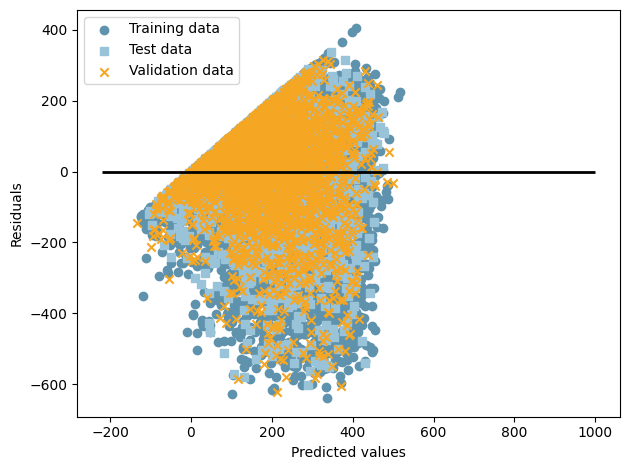

In [36]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
plt.scatter(y_val_pred,  y_val_pred - y_val, c='#f5a623', marker='x', label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()
plt.show()

**Висновки з завдання (детальні)**

ппобудував модель лінійної регресії з використанням підготовлених даних, з набору функцій були видалені нерелевантні змінні, такі як категорії spring, mnth_4, weekday_0, weathersit_1, atemp, date.

Після виконання завдання я отримав модель лінійної регресії з використанням підготовлених даних та виконанням поділу на тренувальну, тестову та валідаційну вибірки. Оцінюючи модель, я отримав наступні результати:

Середньоквадратична помилка (MSE) для тренувальної, тестової та валідаційної вибірок складає відповідно 21922.219, 21588.701 та 20589.916. Це значення відображає рівень помилки моделі, де менше значення MSE вказує на кращу модель.

Коефіцієнт детермінації (R^2) для тренувальної, тестової та валідаційної вибірок становить відповідно 0.345, 0.333 та 0.332. Це значення вказує на те, наскільки добре модель пояснює реальні спостереження, де значення близьке до 1 вказує на високу прогностичну здатність моделі.

На графіку взаємозв'язку між залишками моделі та передбаченими значеннями видно, що залишки розподілені навколо нуля, що вказує на адекватність моделі. Однак можна помітити, що є кілька викидів, які можуть впливати на точність моделі.